In [1]:
import numpy as np

In [3]:
def moving_average(burnin, n, c, theta):
    q = len(theta)
    epsilon = np.random.normal(size=n + burnin)
    ma_values = np.zeros(n + burnin)

    for t in range(q, n + burnin):
        ma_values[t] = c + epsilon[t] + sum([theta[i] * epsilon[t - i - 1] for i in range(q)])

    return ma_values[burnin:]

ma_values = moving_average(100, 5000, 20, [0.8])
print(ma_values[:10])

[21.26470969 20.45170826 19.30914913 19.00934951 20.78000233 19.65427709
 19.80413261 20.32959986 18.3399512  19.13668751]


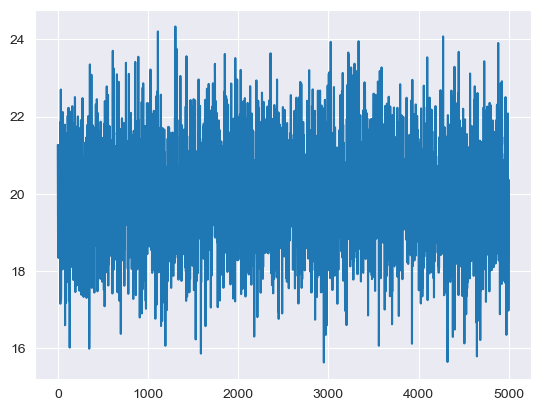

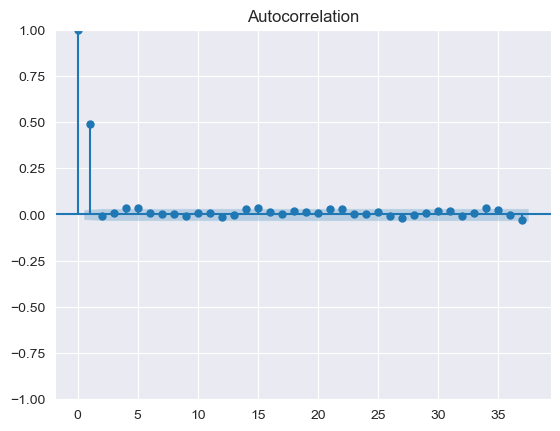

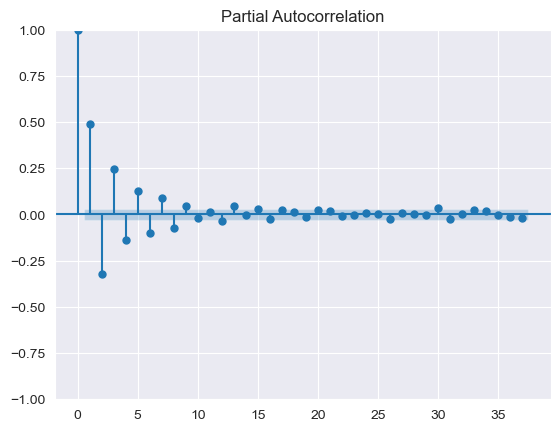

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.plot(ma_values)
plot_acf(ma_values)
plt.show()
plot_pacf(ma_values)
plt.show()

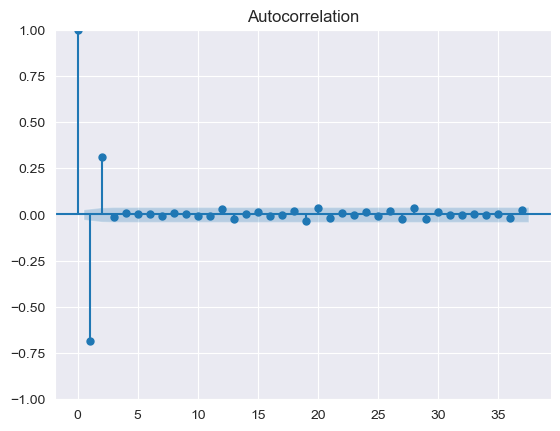

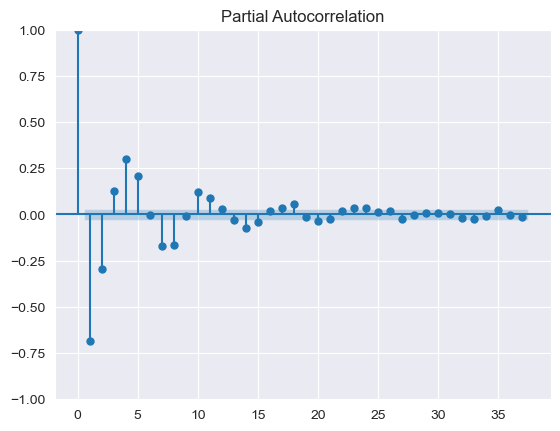

In [9]:
ma_values_2 = moving_average(100, 5000, 0, [-1, 0.8])

# Calculate and plot ACF
plot_acf(ma_values_2)
plt.show()

# Calculate and plot PACF
plot_pacf(ma_values_2)
plt.show()